# Volatility Regime Prediction Checkpoint

## Overview
For the first part of our project, we have created a volatility regime prediction algorithm. To create this algorithm, we used a FRED API to gather data directly from the FRED website as well as using pandas_datareader to gather VIX and stock data. Ultimately, our goal was to create an algorithm that can predict next week's volatility regime using this week's data. Since we are looking to build a volatility regime classifier, we used a random forest machine learning method through Python's sklearn package. The data creation and preparation is done using the class we created called Vol_Data which is stored in the volClass.py file and the model training/testing is done using the class we created called Regime_Predict which is stored in the rfClass.py file.

## Pinnacle Summer Project Folder Directory Information:
### Code folder
     - Contains Data folder that we use to create and manipulate our data
         - Data folder contains rfClass.py which holds Regime_Predict class
         - Data folder contains Inputs folder which holds our volClass.py file that creates the class Vol_Data

## Vol_Data class example

### FRED IDs with labels:

DCOILBRENTEU: European Brent Oil Prices

BAMLH0A0HYM2: US high yield index option-adjusted spread

GOLDAMGBD228NLBM: Gold fixing price in London Bullion

DAAA: Moody's corporate bond yield

RIFSPPFAAD01NB: Overnight commercial paper interest rate

BAMLHE00EHYIOAS: Euro high yield index option-adjusted spread

In [4]:
from Code.Data.Inputs import volClass #imports volClass file which contains Vol_Data

#fred IDs to access Fred data
fred_s = ["DCOILBRENTEU","BAMLH0A0HYM2", "GOLDAMGBD228NLBM","DAAA","RIFSPPFAAD01NB","BAMLHE00EHYIOAS"]

#create vol_data object
# Vol_Data(start_date, end_date = None, fred_strings = None) Notice default for end_date and fred_strings is None
trial_vol = volClass.Vol_Data("2000-01-01", fred_strings = fred_s)

### Vol_Data object's attributes/methods

Vol_Data objects have the methods line_plot and hist_plot to help the user visualize the VIX distribution over the time frame given. We observed that there appears to be key inflection points when the VIX is above 30, between 20 and 30, and below 20. 

We decided to define our regime time frame as 1 week thus if the average VIX value for 1 week is above 30, then we label that as a high volatility regime, if the average is between 20 and 30, we label that as a medium volatility regime, and below 20 is a low volatility regime. When generating the weekly data, we assigned numerical values to represent the different volatility regimes. 1 = low vol regime, 2 = med vol regime, 3 = high vol regime 


The weekly_vix() method will output the transformed weekly VIX data that will assign either a 1, 2, or 3 to represent the volatility regime for that week. The weekly_fred_data() method will output a dataframe that contains the inputs of the weekly FRED data we will use as well as SPY volume for now. 

We plan on adding a lot more options for the input data (such as exchange rates, housing data, etc.).

VIX Close Graph: 


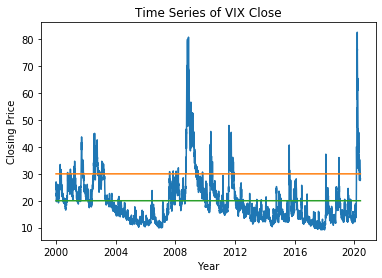



VIX Hist Distr: 


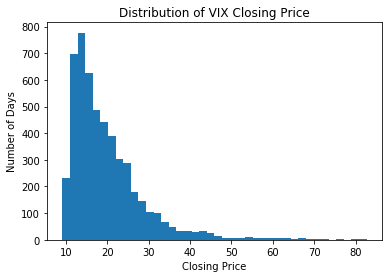



VIX Weekly Regime Data: 
            Weekly_Vol
Week                  
2000-01-03           2
2000-01-10           2
2000-01-18           2
2000-01-24           2
2000-01-31           2
...                ...
2020-04-27           3
2020-05-04           3
2020-05-11           3
2020-05-18           2
2020-05-26           2

[1065 rows x 1 columns]


Input Data: 
            DCOILBRENTEU  BAMLH0A0HYM2  GOLDAMGBD228NLBM   DAAA  \
Week                                                              
2000-01-03        25.704        4.7880          570.4300  7.726   
2000-01-10        24.344        4.7720          282.4000  7.804   
2000-01-18        26.480        4.7475          287.9125  7.880   
2000-01-24        26.988        4.8080          286.7400  7.732   
2000-01-31        27.332        4.8920          284.5100  7.648   
...                  ...           ...               ...    ...   
2020-04-27        17.046        7.8460         1704.2300  2.384   
2020-05-04        23.704       

In [11]:
print("VIX Close Graph: ")
trial_vol.line_plot()

print("\n\nVIX Hist Distr: ")
trial_vol.hist_plot()

print("\n\nVIX Weekly Regime Data: ")
print(trial_vol.weekly_vix())

print("\n\nInput Data: ")
print(trial_vol.weekly_fred_data())

## Creation of Regime_Predict class

The Vol_Data class is meant to prepare the data we need to run our random forest to predict/classify volatility regimes. To predict volatility regimes, we use the Regime_Predict class we created which is stored in the rfClass.py file.

The Regime_Predict class takes in a Vol_Data object as an input and runs a random forest to predict volatility regimes. The Regime_Predict class uses the weekly_vix() method from the Vol_Data object as its target variable and the weekly_fred_data() method as its input data.

We included the methods Regime_Accuracy() and plot_feature_importances() to show the prediction accuracy of our model and which features in our model were most important. We plan to add many more methods to evaluate the performance of the model.

In [14]:
from Code.Data import rfClass

# Regime_Predict(Vol_Data object, test_size = .3, n_estimators= 10) we chose default test data size as .3 and n_estimators for random forest as 10
trial_regime_predict = rfClass.Regime_Predict(trial_vol)

C:\Users\home\OneDrive\Pinnacle Summer Project\Code\Data\rfClass.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.clf.fit(self.X_train, self.y_train)


Volatility Regime Prediction Accuracy: 
0.9


Feature importance plot: 


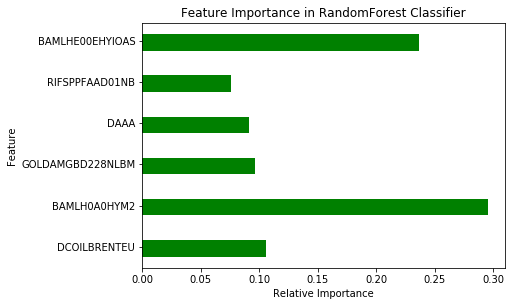

<Figure size 360x360 with 0 Axes>

In [17]:
print("Volatility Regime Prediction Accuracy: ")
print(trial_regime_predict.Regime_Accuracy())

print("\n\nFeature importance plot: ")
trial_regime_predict.plot_feature_importances()

### The next step of our project is to find the optimal input data to predict volatility regimes and to build/test how portfolios should be rebalanced when investors know what next week's volatility regime will be. 